In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [ ]:
#mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalization of input data
x_train = x_train / 255
x_test = x_test / 255

# Переформатування даних для роботи з CNN
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

input_img = Input(shape=(28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Енкодер
x = Conv2D(28, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

encoder = Model(input_img, encoded, name="encoder")
# Декодер
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


# Модель автоенкодера
autoencoder = Model(input_img, decoded, name="autoencoder")
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Тренування моделі
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.2446 - val_loss: 0.0796
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0786 - val_loss: 0.0743
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0738 - val_loss: 0.0714
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0716 - val_loss: 0.0704
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0704 - val_loss: 0.0692
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0695 - val_loss: 0.0682
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0687 - val_loss: 0.0676
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0681 - val_loss: 0.0672
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0676 - val_loss: 0.0668
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0673 - val_loss: 0.0664
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0668 - val_loss: 0.0663
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9m

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step


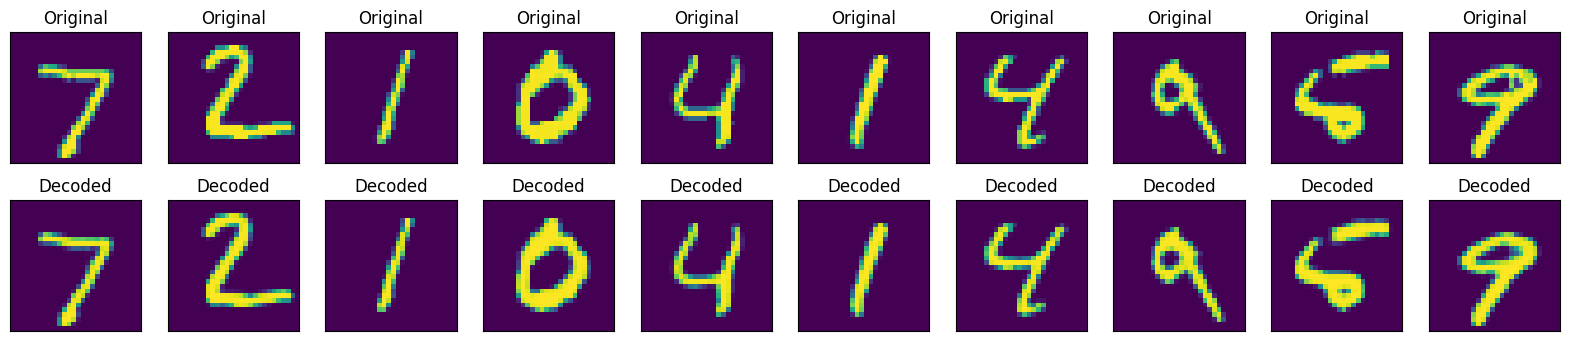

In [ ]:
 n = 10
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

# Displaying original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Decoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()



In [ ]:
def plot_digits(*images):
    images = [x.squeeze() for x in images]
    n = min([x.shape[0] for x in images])

    plt.figure(figsize=(2 * n, 2 * len(images)))
    for j in range(n):
        for i in range(len(images)):
            ax = plt.subplot(len(images), n, i * n + j + 1)
            plt.imshow(images[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

def plot_homotopy(frm, to, n=10, autoencoder=None):
    z = np.zeros(([n] + list(frm.shape)))
    for i, t in enumerate(np.linspace(0., 1., n)):
        z[i] = frm * (1 - t) + to * t  # Гомотопія по прямій
    if autoencoder:
        plot_digits(autoencoder.predict(z, batch_size=n))
    else:
        plot_digits(z)






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


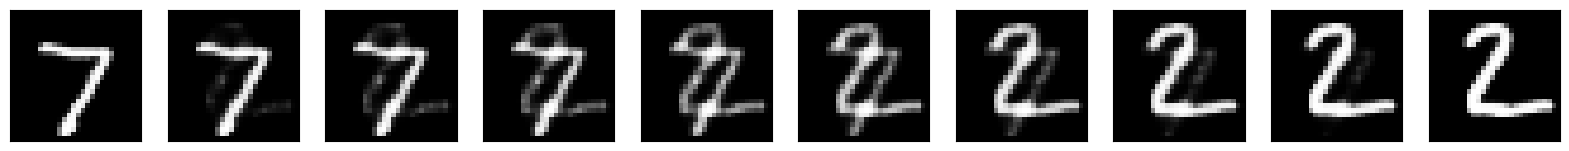

In [ ]:
frm, to = x_test[:2]  # Вибір декількох зображень для гомотопії
plot_homotopy(frm, to, autoencoder=autoencoder)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


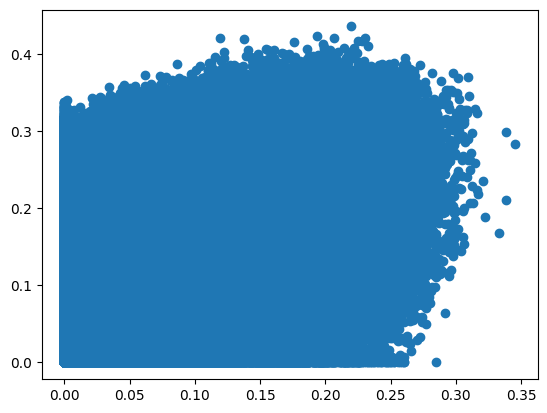

In [ ]:
h = encoder.predict(x_test)
plt.scatter(h[:, 0], h[:, 1])